# Dataset download and Exploration

In this section we will download the [NNGen Dataset](https://github.com/Tbabm/nngen/tree/master) publicly available on github. The collection and filtration process is adopted from the [NMT-based Commit Generation](https://dl.acm.org/doi/pdf/10.1145/3238147.3238190?casa_token=PQjtlNRBvJgAAAAA:dGLvlol87sT5a8biu2oEV9g5HWucpTiHaPZma8Iy1T3DNWCPQEEvupzyQK7mtg7WYRfn2SB_xSlu) paper and can be summarized as follows: 
- The dataset is collected from the top 1K Java repositories from github
- Branch merging, rollback commits and very large diffs were removed from the raw commit dataset
- To remove noisy and low-information commits, commit ids, issue ids, messages longer than 30 characters were removed.
- A Verb - Direct message filtration scheme was used to commits with conventional patterns, e.g: "[delete] : redundant text normalization function"
- The final dataset contains  $26,208$, $3,000$, and $3,000$ commits for train-validation-test splits, respectively.


In the next few code blocks, we try to do some basic exploration of the dataset. However, the `diffs` in this dataset are not in a standard format and are not easily readable. Therefore, we will not be able to do any meaningful analysis on the diffs - such as finding the most common code changes (addition, deletion, etc.). And so most of our analysis will be based on the commit messages.

In [1]:
import os 
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr3/graduate/nimzia/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
BASE_DATASET_PATH = '../nngen/data/'
DIFF_FILE_SUFFIX = '.diff'
COMMIT_FILE_SUFFIX = '.msg'
def preprocess_word(word):
    word = word.lower()
    word = word.translate(str.maketrans('', '', string.digits))
    return word
def read_data( split_name):
    with open(os.path.join(BASE_DATASET_PATH, split_name+DIFF_FILE_SUFFIX), 'r') as diff_file, open(os.path.join(BASE_DATASET_PATH, split_name+COMMIT_FILE_SUFFIX), 'r') as commit_file:
        diff_lines = diff_file.readlines()
        diff_lines = [diff.strip() for diff in diff_lines]
        commit_lines = commit_file.readlines()
        commit_words = [line.strip().split() for line in commit_lines]
        commit_words = [word for line in commit_words for word in line]
        commit_words = [' '.join(word for word in commit_words)]
        return diff_lines, commit_lines

train_diff_lines, train_commit_lines = read_data('cleaned.train')
valid_diff_lines, valid_commit_lines = read_data('cleaned.valid')
test_diff_lines, test_commit_lines = read_data('cleaned.test')

print('Number of training examples: ', len(train_diff_lines))
print('Number of validation examples: ', len(valid_diff_lines))
print('Number of test examples: ', len(test_diff_lines))


total_diff_lines = train_diff_lines + valid_diff_lines + test_diff_lines
total_commit_lines = train_commit_lines + valid_commit_lines + test_commit_lines

print('Total number of examples: ', len(total_diff_lines))

Number of training examples:  22112
Number of validation examples:  2511
Number of test examples:  2521
Total number of examples:  27144


In [3]:
# open a sample diff file and commit file and print the first 10 lines of each
SAMPLE_DIFF_FILE = '/projectnb/cs505ws/students/nimzia/project/nngen/data/cleaned.train.diff'
SAMPLE_COMMIT_FILE = '/projectnb/cs505ws/students/nimzia/project/nngen/data/cleaned.train.msg'

with open(SAMPLE_DIFF_FILE, 'r') as diff_file:
    diff_lines = diff_file.readlines()
    print('Sample diff file: {}'.format(SAMPLE_DIFF_FILE))
    for line in diff_lines[:1]:
        print(line)
    print('')

with open(SAMPLE_COMMIT_FILE, 'r') as commit_file:
    commit_lines = commit_file.readlines()
    print('Sample commit file: {}'.format(SAMPLE_COMMIT_FILE))
    for line in commit_lines[:1]:
        print(line)
    print('')

Sample diff file: /projectnb/cs505ws/students/nimzia/project/nngen/data/cleaned.train.diff
new file mode 100755 <nl> index 0000000 . . d125c52 <nl> Binary files / dev / null and b / art / intro . png differ <nl> 


Sample commit file: /projectnb/cs505ws/students/nimzia/project/nngen/data/cleaned.train.msg
Added intro image . 




### Length distribution of commit messages

From the analysis of the histogram below, we can see that the length of commit message is a left-skewed long-tailed distribution. Most of the commit messages are short, varying between 1 to 10 characters. The mean length of commit messages is approximately 7 for all splits. This tells us that the dataset contains very short commit messages.

--------------------TRAIN DATA--------------------


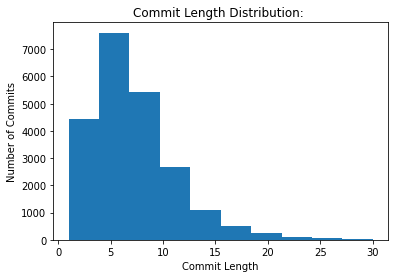

Number of commits: 22112
Average commit length: 6.944012301013025
Max commit length: 30
Min commit length: 1

--------------------VALID DATA--------------------


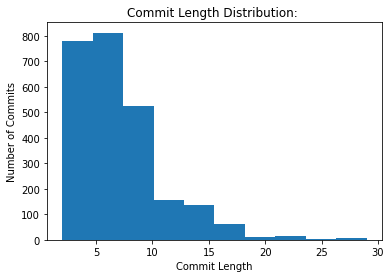

Number of commits: 2511
Average commit length: 6.941855834328953
Max commit length: 29
Min commit length: 2

--------------------TEST DATA--------------------


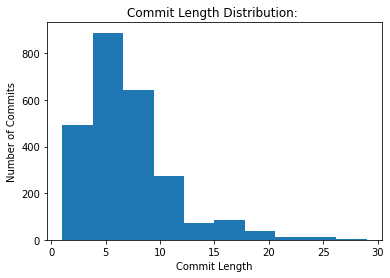

Number of commits: 2521
Average commit length: 6.929393097976993
Max commit length: 29
Min commit length: 1



In [7]:
# get the length distribution of commits for each language in the train set
def plot_histogram(data, title, xlabel, ylabel, bins=10):
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


commit_lengths = [len(line.split()) for line in train_commit_lines]
print("--------------------TRAIN DATA--------------------")
plot_histogram(commit_lengths, 'Commit Length Distribution: ', 'Commit Length', 'Number of Commits')
print('Number of commits: {}'.format(len(commit_lengths)))
print('Average commit length: {}'.format(sum(commit_lengths) / len(commit_lengths)))
print('Max commit length: {}'.format(max(commit_lengths)))
print('Min commit length: {}'.format(min(commit_lengths)))
print('')

commit_lengths = [len(line.split()) for line in valid_commit_lines]
print("--------------------VALID DATA--------------------")
plot_histogram(commit_lengths, 'Commit Length Distribution: ', 'Commit Length', 'Number of Commits')
print('Number of commits: {}'.format(len(commit_lengths)))
print('Average commit length: {}'.format(sum(commit_lengths) / len(commit_lengths)))
print('Max commit length: {}'.format(max(commit_lengths)))
print('Min commit length: {}'.format(min(commit_lengths)))
print('')

commit_lengths = [len(line.split()) for line in test_commit_lines]
print("--------------------TEST DATA--------------------")
plot_histogram(commit_lengths, 'Commit Length Distribution: ', 'Commit Length', 'Number of Commits')
print('Number of commits: {}'.format(len(commit_lengths)))
print('Average commit length: {}'.format(sum(commit_lengths) / len(commit_lengths)))
print('Max commit length: {}'.format(max(commit_lengths)))
print('Min commit length: {}'.format(min(commit_lengths)))
print('')

### Length distribution of diffs 
The diffs are significantly larger than the commits with an average length of 69 characters. Majority of the code changes were between 75 to 90 characters. 

--------------------TRAIN DATA--------------------


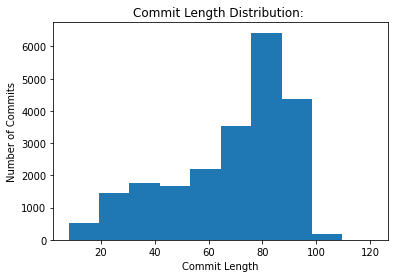

Number of commits: 22112
Average commit length: 68.22883502170767
Max commit length: 121
Min commit length: 8

--------------------VALID DATA--------------------


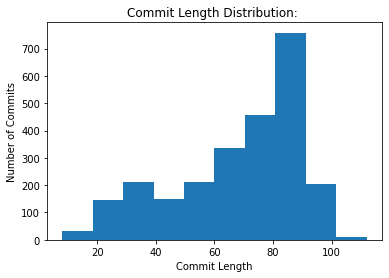

Number of commits: 2511
Average commit length: 68.25766626841896
Max commit length: 112
Min commit length: 8

--------------------TEST DATA--------------------


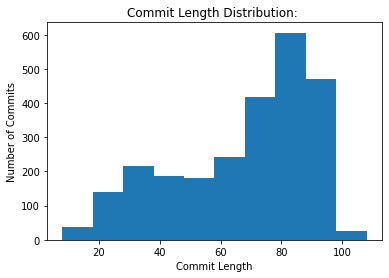

Number of diffs: 2521
Average diff length: 67.22808409361365
Max diff length: 108
Min diff length: 8



In [15]:
# get the length distribution of diffs for each splits 
def plot_histogram(data, title, xlabel, ylabel, bins=10):
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


commit_lengths = [len(line.split()) for line in train_diff_lines]
print("--------------------TRAIN DATA--------------------")
plot_histogram(commit_lengths, 'Commit Length Distribution: ', 'Commit Length', 'Number of Commits')
print('Number of commits: {}'.format(len(commit_lengths)))
print('Average commit length: {}'.format(sum(commit_lengths) / len(commit_lengths)))
print('Max commit length: {}'.format(max(commit_lengths)))
print('Min commit length: {}'.format(min(commit_lengths)))
print('')

commit_lengths = [len(line.split()) for line in valid_diff_lines]
print("--------------------VALID DATA--------------------")
plot_histogram(commit_lengths, 'Commit Length Distribution: ', 'Commit Length', 'Number of Commits')
print('Number of commits: {}'.format(len(commit_lengths)))
print('Average commit length: {}'.format(sum(commit_lengths) / len(commit_lengths)))
print('Max commit length: {}'.format(max(commit_lengths)))
print('Min commit length: {}'.format(min(commit_lengths)))
print('')

commit_lengths = [len(line.split()) for line in test_diff_lines]
print("--------------------TEST DATA--------------------")
plot_histogram(commit_lengths, 'Commit Length Distribution: ', 'Commit Length', 'Number of Commits')
print('Number of diffs: {}'.format(len(commit_lengths)))
print('Average diff length: {}'.format(sum(commit_lengths) / len(commit_lengths)))
print('Max diff length: {}'.format(max(commit_lengths)))
print('Min diff length: {}'.format(min(commit_lengths)))
print('')

### Most frequent words 
Because we haven't preprocessed the dataset, the bar plot of the most frequent words across all the splits seem to present us a similar combination of various stop words. But interestingly, even for non-stop words, there are noticeable word overlaps showing that the splits are pulled from the same data distribution. Absence of words like "merge", "rollback", "fix", etc. in the most frequent words also tells us that the dataset is already filtered for such commits neatly. 

--------------------TRAIN DATA--------------------


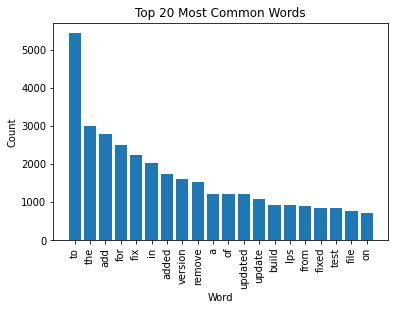


--------------------VALID DATA--------------------


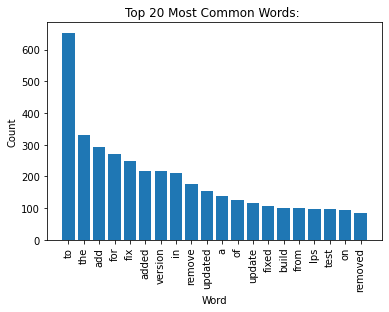


--------------------TEST DATA--------------------


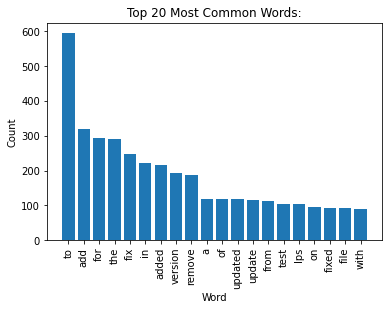

In [9]:
# generate barplot of top 20 most common words in the commit messages for each language
import string 
def plot_barplot(data, title, xlabel, ylabel, top_n=20):
    data = data.most_common(top_n)
    words = [word for word, count in data]
    counts = [count for word, count in data]
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()


def preprocess_word(word):
    word = word.lower()
    word = word.translate(str.maketrans('', '', string.punctuation))
    word = word.translate(str.maketrans('', '', string.digits))
    return word


print("--------------------TRAIN DATA--------------------")
commit_words = [line.split() for line in train_commit_lines]
commit_words = [word for line in commit_words for word in line]
commit_words = [preprocess_word(word) for word in commit_words]
commit_words = [word for word in commit_words if len(word.strip()) > 0]
commit_words = Counter(commit_words)
plot_barplot(commit_words, 'Top 20 Most Common Words','Word', 'Count')
print('')

print("--------------------VALID DATA--------------------")
commit_words = [line.split() for line in valid_commit_lines]
commit_words = [word for line in commit_words for word in line]
commit_words = [preprocess_word(word) for word in commit_words]
commit_words = [word for word in commit_words if len(word.strip()) > 0]
commit_words = Counter(commit_words)
plot_barplot(commit_words, 'Top 20 Most Common Words: ', 'Word', 'Count')
print('')

print("--------------------TEST DATA--------------------")

commit_words = [line.split() for line in test_commit_lines]
commit_words = [word for line in commit_words for word in line]
commit_words = [preprocess_word(word) for word in commit_words]
commit_words = [word for word in commit_words if len(word.strip()) > 0]
commit_words = Counter(commit_words)
plot_barplot(commit_words, 'Top 20 Most Common Words:', 'Word', 'Count')
print('')


### Most frequent verbs 
The dataset was filtered through a Verb - Direct message scheme. Thus if we only take a look at the `verbs` present in the commits we get a more meaningful idea about the constituency of the dataset. As expected, most of the verbs are related to adding or removing snippets from files. Since the commits are pulled from Java repositories, we can also see prevalence of terms associated with Java's frameworks , i.e: `build` and `travis`

--------------------TRAIN DATA--------------------


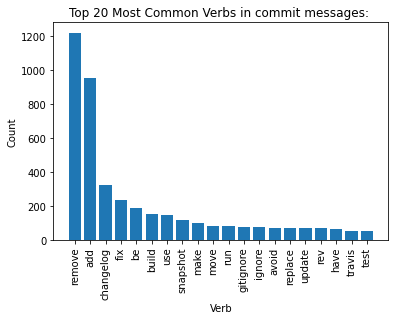

--------------------VALID DATA--------------------


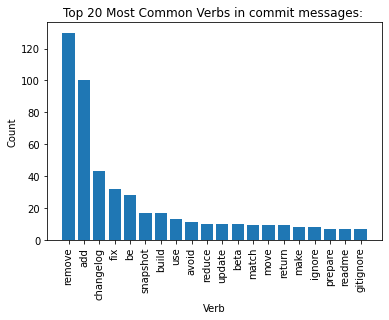

--------------------TEST DATA--------------------


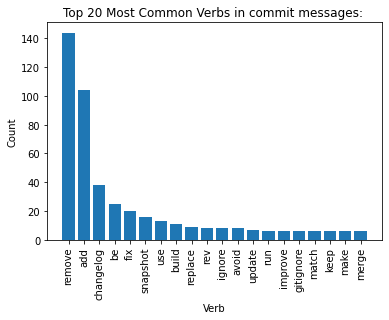

In [12]:

def identify_verbs(commit_words):
    commit_words = nltk.pos_tag(commit_words)
    commit_words = [word for word, tag in commit_words if tag == 'VB']
    return commit_words

print("--------------------TRAIN DATA--------------------")
commit_words = [line.split() for line in train_commit_lines if len(line.split()) > 0]
commit_words = [word for line in commit_words for word in line]
commit_words = [preprocess_word(word) for word in commit_words]
commit_words = [word for word in commit_words if len(word.strip()) > 0]
# identify the verbs in the commit messages
verbs = identify_verbs(commit_words)
verbs = Counter(verbs)
plot_barplot(verbs, 'Top 20 Most Common Verbs in commit messages: ', 'Verb', 'Count')

print("--------------------VALID DATA--------------------")
commit_words = [line.split() for line in valid_commit_lines if len(line.split()) > 0]
commit_words = [word for line in commit_words for word in line]
commit_words = [preprocess_word(word) for word in commit_words]
commit_words = [word for word in commit_words if len(word.strip()) > 0]
# identify the verbs in the commit messages
verbs = identify_verbs(commit_words)
verbs = Counter(verbs)
plot_barplot(verbs, 'Top 20 Most Common Verbs in commit messages: ', 'Verb', 'Count')

print("--------------------TEST DATA--------------------")
commit_words = [line.split() for line in test_commit_lines if len(line.split()) > 0]
commit_words = [word for line in commit_words for word in line]
commit_words = [preprocess_word(word) for word in commit_words]
commit_words = [word for word in commit_words if len(word.strip()) > 0]
# identify the verbs in the commit messages
verbs = identify_verbs(commit_words)
verbs = Counter(verbs)
plot_barplot(verbs, 'Top 20 Most Common Verbs in commit messages: ', 'Verb', 'Count')

### Overview 
We have used a relatively simple dataset for our demonstration. While the commit messages are rather small, the dataset itself is well distributed and clean across all the splits. Availability of a good diff parser would allow us to also perform sophisticated analysis of these diffs.